In [81]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings(action = "ignore")

In [82]:
data = pd.read_csv("Chennai house data.csv")

In [83]:
data["price"].max()

1422.0

In [84]:
data.isnull().sum()

price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

In [85]:
#data = data.drop(columns=["bathroom"])
#data

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


# Missing Values

In [87]:
data['age'].unique()

array([ 1., nan,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12.,
       16., 17.,  8., 32.])

In [88]:
data['age'].unique()

array([ 1., nan,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12.,
       16., 17.,  8., 32.])

In [89]:
data['age'].fillna((data['age'].median()), inplace = True)

In [90]:
data['age'].unique()

array([ 1.,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12., 16.,
       17.,  8., 32.])

In [91]:
data['age'].fillna((data['age'].median()), inplace = True)

In [92]:
data['age'].unique()

array([ 1.,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12., 16.,
       17.,  8., 32.])

In [93]:
data['bathroom'].fillna((data['bathroom'].mean()), inplace = True)

In [94]:
data["price"].max()

1422.0

# Outliers

In [95]:
px.box(data['price'])

In [96]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['price'] = np.where(data['price'] > ubound, ubound,np.where(data['price'] < lbound, lbound, data['price']))


42.0 90.0 48.0
-30.0 162.0


In [97]:

px.box(data['price'])

In [98]:
px.box(data['area'])

In [99]:
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['area'] = np.where(data['area'] > ubound, ubound, 
                        np.where(data['area'] < lbound, lbound, data['area']))
px.box(data['area'])

877.0 1471.25 594.25
-14.375 2362.625


In [100]:
px.box(data['bhk'])

In [101]:
Q1 = data['bhk'].quantile(0.25)
Q3 = data['bhk'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['bhk'] = np.where(data['bhk'] > ubound, ubound, 
                        np.where(data['bhk'] < lbound, lbound, data['bhk']))
px.box(data['bhk'])

2.0 3.0 1.0
0.5 4.5


In [102]:
Q1 = data['bathroom'].quantile(0.25)
Q3 = data['bathroom'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['bathroom'] = np.where(data['bathroom'] > ubound, ubound, 
                        np.where(data['bathroom'] < lbound, lbound, data['bathroom']))
px.box(data['bathroom'])

2.0 2.359230220955096 0.35923022095509616
1.4611546685673558 2.8980755523877404


In [103]:
px.box(data['age'])

In [104]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
# Define bounds
lbound = Q1 - 1.5 * IQR
ubound = Q3 + 1.5 * IQR
print(lbound,ubound)
# Replace outliers with the respective bounds
data['age'] = np.where(data['age'] > ubound, ubound, 
                        np.where(data['age'] < lbound, lbound, data['age']))
px.box(data['age'])

0.0 1.0 1.0
-1.5 2.5


In [105]:
data

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872.0,Ready to move,2.0,2.359230,1.0,Sembakkam,MP Developers
1,93.54,1346.0,Under Construction,3.0,2.000000,0.0,Selaiyur,DAC Promoters
2,151.00,2225.0,Under Construction,3.0,2.359230,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028.0,Ready to move,2.0,2.000000,2.5,Ambattur,Dugar Housing Builders
4,42.28,588.0,Under Construction,2.0,1.461155,0.0,Pallavaram,Radiance Realty Developers India Ltd
...,...,...,...,...,...,...,...,...
2615,27.50,750.0,Ready to move,2.0,2.000000,2.5,Veppampattu,Velan Housing Properties
2616,27.50,750.0,Ready to move,2.0,2.000000,2.5,Veppampattu,Velan Housing Properties
2617,30.00,800.0,Ready to move,2.0,2.000000,2.5,Veppampattu,Velan Housing Properties
2618,31.50,850.0,Ready to move,2.0,2.000000,2.5,Veppampattu,Velan Housing Properties


# visvalaisation

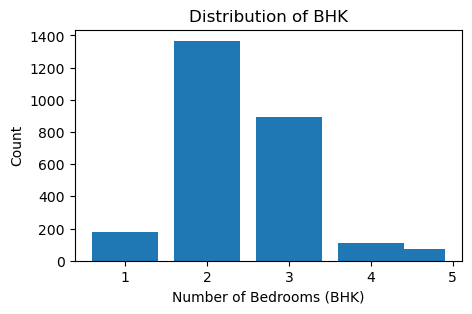

In [106]:
x = data["bhk"].value_counts()

plt.figure(figsize=(5, 3))  
plt.bar(x.index, x.values)
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Count')
plt.title('Distribution of BHK')
plt.show()

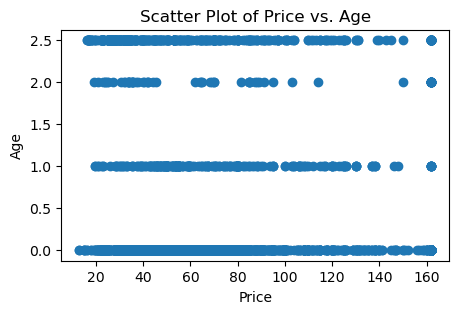

In [107]:
plt.figure(figsize=(5, 3))  
plt.scatter(data['price'], data['age'])
plt.xlabel('Price')
plt.ylabel('Age')
plt.title('Scatter Plot of Price vs. Age')
plt.show()

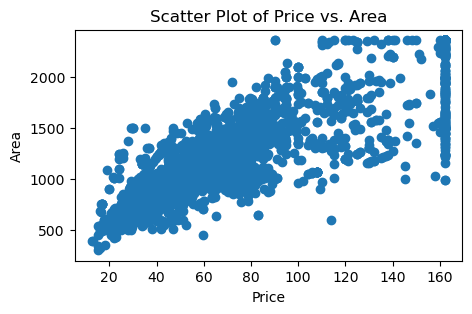

In [108]:
plt.figure(figsize=(5, 3))  
plt.scatter(data['price'], data['area'])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Scatter Plot of Price vs. Area')
plt.show()

In [109]:
filtered_data = data[~data['bhk'].isin([1.5, 2.5, 3.5, 4.5])]

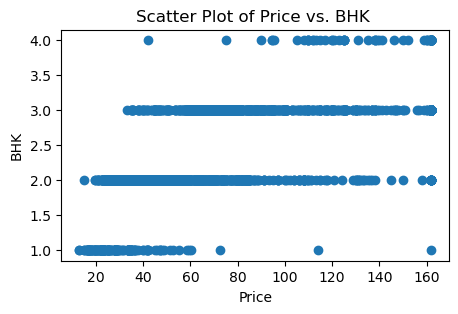

In [110]:
plt.figure(figsize=(5, 3))  # Set the figure size
plt.scatter(filtered_data['price'], filtered_data['bhk'])
plt.xlabel('Price')
plt.ylabel('BHK')
plt.title('Scatter Plot of Price vs. BHK ')
plt.show()


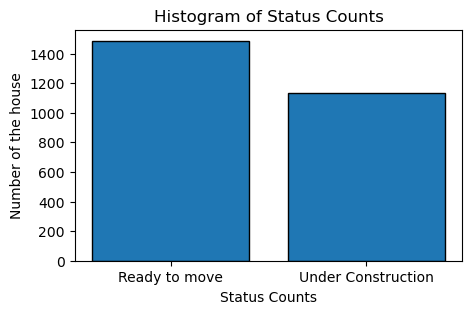

In [111]:
x = data["status"].value_counts()
plt.figure(figsize=(5, 3))  
plt.bar(x.index, x.values, edgecolor='black') 
plt.xlabel('Status Counts')
plt.ylabel('Number of the house')
plt.title('Histogram of Status Counts')
plt.show()

# Label Encoder

In [112]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data["location"] = le.fit_transform(data["location"])
data["builder"] = le.fit_transform(data["builder"])
data["status"] = le.fit_transform(data["status"])
data.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872.0,0,2.0,2.359230,1.0,137,60
1,93.54,1346.0,1,3.0,2.000000,0.0,136,20
2,151.00,2225.0,1,3.0,2.359230,0.0,82,18
3,49.00,1028.0,0,2.0,2.000000,2.5,5,26
4,42.28,588.0,1,2.0,1.461155,0.0,105,88


In [113]:
data = data.drop(columns = "bathroom")

# Splitting data

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['price']
X = scaler.fit_transform(data.drop(columns = ['price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['price']).columns)
X.head()

,area,status,bhk,age,location,builder
0,-0.729629,-0.87289,-0.566140,0.401067,0.768583,-0.233426
1,0.248971,1.14562,0.762375,-0.608343,0.748789,-1.127770
2,2.063716,1.14562,0.762375,-0.608343,-0.320079,-1.172488
3,-0.407558,-0.87289,-0.566140,1.915181,-1.844205,-0.993619
4,-1.315963,1.14562,-0.566140,-0.608343,0.135180,0.392616


In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


    feature       VIF
0      area  3.413334
1    status  1.442710
2       bhk  3.421690
3       age  1.417218
4  location  1.009604
5   builder  1.037012


# Linear Regreesion

In [116]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
model = lr.fit(x_train,y_train)

In [117]:
acc = lr.score(x_test, y_test)*100
acc

80.82932388517652

In [118]:
predictions1 = lr.predict(x_test)

In [121]:
fig = px.scatter(x=y_test, y=predictions1, trendline='ols', trendline_color_override="black")
fig.update_layout(
    title={
        'text': 'Linear Regression Predictions vs Actual Values',
        'font': {
            'color': 'black',
            'size': 20,
            'family': 'Arial'
        }
    },
    xaxis_title={
        'text': 'Actual Values',
        'font': {
            'color': 'black',
            'size': 18,
            'family': 'Arial'
        }
    },
    yaxis_title={
        'text': 'Predicted Values',
        'font': {
            'color': 'black',
            'size': 18,
            'family': 'Arial'
        }
    }
)
fig.show()

# prediction outcome

In [40]:
speific = [[872,0,2.0,1.0,137,60]]
result_scale = scaler.transform(speific)
result1 = lr.predict(result_scale)
print("Linear regression result ",result1)

Linear regression result  [44.22481746]


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions1) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test,y_pred=predictions1) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions1,squared=False) 

print("MAE:",mae) 
print("MSE:",mse) 
print("RMSE:",rmse)

MAE: 12.940747731488765
MSE: 327.5503323404738
RMSE: 18.098351647055424


In [42]:
X.corr()

,area,status,bhk,age,location,builder
area,1.000000,-0.036905,0.839627,-0.036764,-0.040621,-0.061380
status,-0.036905,1.000000,-0.015683,-0.531016,-0.045159,-0.147393
bhk,0.839627,-0.015683,1.000000,-0.075948,-0.052221,-0.035444
age,-0.036764,-0.531016,-0.075948,1.000000,-0.003347,0.018900
location,-0.040621,-0.045159,-0.052221,-0.003347,1.000000,0.066975
builder,-0.061380,-0.147393,-0.035444,0.018900,0.066975,1.000000


In [43]:
data

,price,area,status,bhk,age,location,builder
0,37.49,872.0,0,2.0,1.0,137,60
1,93.54,1346.0,1,3.0,0.0,136,20
2,151.00,2225.0,1,3.0,0.0,82,18
3,49.00,1028.0,0,2.0,2.5,5,26
4,42.28,588.0,1,2.0,0.0,105,88
...,...,...,...,...,...,...,...
2615,27.50,750.0,0,2.0,2.5,171,122
2616,27.50,750.0,0,2.0,2.5,171,122
2617,30.00,800.0,0,2.0,2.5,171,122
2618,31.50,850.0,0,2.0,2.5,171,122


# Polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split as tts
PF = PolynomialFeatures(degree=3, include_bias=False)
X_poly = PF.fit_transform(X)
x_train, x_test, y_train, y_test = tts(X_poly, Y, test_size=0.1, random_state=100)
lr = LinearRegression()
model = lr.fit(x_train, y_train)


In [45]:
acc1 = lr.score(x_test, y_test) * 100
print("Accuracy:", acc1)


Accuracy: 84.47664122522282


In [46]:
predictions2 = lr.predict(x_test)

In [47]:
fig = px.scatter(x=y_test, y=predictions2, trendline='ols', trendline_color_override="black")
fig.update_layout(
    title='Polynomial Regression Predictions vs Actual Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values'
)
fig.show()

In [48]:
specific = [[872, 0, 2.0, 1.0, 137, 60]]
specific_scaled = scaler.transform(specific)
specific_poly = PF.transform(specific_scaled)
result2 = lr.predict(specific_poly)
print("polynamial regression result", result2)


polynamial regression result [56.26074219]


In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae1 = mean_absolute_error(y_test, predictions2)
mse1 = mean_squared_error(y_test, predictions2)
rmse1 = mean_squared_error(y_test, predictions2, squared=False)

print("MAE:", mae1)
print("MSE:", mse1)
print("RMSE:", rmse1)

MAE: 11.409535424618321
MSE: 265.2322377814839
RMSE: 16.28595216072686


# Ridge Regression

In [50]:
Y = data['price']
X = data.drop(columns=['price'])

# Scale the dataset (assuming X needs to be scaled)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.1, random_state=100)
from sklearn.linear_model import Ridge 
model = Ridge(alpha = 1)
model.fit(x_train, y_train)

# Make predictions on the test set
predictions3 = model.predict(x_test)

# Evaluate the model accuracy
acc2 = model.score(x_test, y_test) * 100  # score with test data
print("Model accuracy on test data:", acc2)


Model accuracy on test data: 80.8290864020206


In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to test
alpha_values = [0.01, 0.1, 1, 10, 100]

# Create a Ridge regression model
ridge = Ridge()

# Create a parameter grid
param_grid = {'alpha': alpha_values}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Print the best alpha value
print("Best alpha:", grid_search.best_params_['alpha'])


Best alpha: 100


In [52]:
predictions3 = model.predict(x_test)

In [122]:
fig = px.scatter(x = y_test,y = predictions3 ,trendline = 'ols', trendline_color_override="black")
fig.update_layout(
    title={
        'text': 'Linear Regression Predictions vs Actual Values',
        'font': {
            'color': 'black',
            'size': 20,
            'family': 'Arial'
        }
    },
    xaxis_title={
        'text': 'Actual Values',
        'font': {
            'color': 'black',
            'size': 18,
            'family': 'Arial'
        }
    },
    yaxis_title={
        'text': 'Predicted Values',
        'font': {
            'color': 'black',
            'size': 18,
            'family': 'Arial'
        }
    }
)
fig.show()

In [54]:
specific = [[872, 0, 2.0, 1.0, 137, 60]]
result3 = model.predict(specific)
print("Ridge regression result", result3)



Ridge regression result [44.22578689]


In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae2 = mean_absolute_error(y_true=y_test,y_pred=predictions3) 
#squared True returns MSE value, False returns RMSE value. 
mse2 = mean_squared_error(y_true=y_test,y_pred=predictions3) #default=True 
rmse2 = mean_squared_error(y_true=y_test,y_pred=predictions3,squared=False) 

print("MAE:",mae2) 
print("MSE:",mse2) 
print("RMSE:",rmse2)

MAE: 12.940742214749672
MSE: 327.5543899796612
RMSE: 18.098463746397407


# Elastic Net Regression

In [56]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import ElasticNet as en
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
model1 = en(alpha = 0.5, tol = 0.001, random_state = 100) 
model1.fit(x_train, y_train)

ElasticNet(alpha=0.5, random_state=100, tol=0.001)

In [57]:
acc3 = model1.score(x_test, y_test)*100
acc3

80.65328006501028

In [58]:
predictions4 = model1.predict(x_test)

In [123]:
fig = px.scatter(x = y_test,y = predictions4 ,trendline = 'ols', trendline_color_override="black")
fig.update_layout(
    title={
        'text': 'Linear Regression Predictions vs Actual Values',
        'font': {
            'color': 'black',
            'size': 20,
            'family': 'Arial'
        }
    },
    xaxis_title={
        'text': 'Actual Values',
        'font': {
            'color': 'black',
            'size': 18,
            'family': 'Arial'
        }
    },
    yaxis_title={
        'text': 'Predicted Values',
        'font': {
            'color': 'black',
            'size': 18,
            'family': 'Arial'
        }
    }
)
fig.show()


In [60]:
specific = [[872, 0, 2.0, 1.0, 137, 60]]
#specific_scaled = scaler.transform()
result4 = model1.predict(specific)
print("Elasity net result", result4)



Elasity net result [44.76155693]


In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae3 = mean_absolute_error(y_true=y_test,y_pred=predictions4) 
#squared True returns MSE value, False returns RMSE value. 
mse3 = mean_squared_error(y_true=y_test,y_pred=predictions4) #default=True 
rmse3 = mean_squared_error(y_true=y_test,y_pred=predictions4,squared=False) 

print("MAE:",mae3) 
print("MSE:",mse3) 
print("RMSE:",rmse3)

MAE: 12.950491699249362
MSE: 330.55821852333787
RMSE: 18.181260091735606


# Gradient Boosting algorithm

In [62]:
Y = data['price']
X = data.drop(columns=['price'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

from sklearn.linear_model import Ridge 

x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.1, random_state=100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
lr = LinearRegression()
lrboost2 = GradientBoostingRegressor(init=lr, n_estimators=100, random_state=100)
lrboost2.fit(x_train, y_train)

# Make predictions
predictions5 = lrboost2.predict(x_test)

# Calculate accuracy
acc4 = lrboost2.score(x_test, y_test) * 100

specific = [[872, 0, 2.0, 1.0, 137, 60]]
specific_scaled = scaler.transform(specific)
result5 = lrboost2.predict(specific_scaled)
print("Gradient Boosting algorithm result", result5)


# Calculate evaluation metrics
mae4 = mean_absolute_error(y_true=y_test, y_pred=predictions5)
mse4 = mean_squared_error(y_true=y_test, y_pred=predictions5)
rmse4 = mean_squared_error(y_true=y_test, y_pred=predictions5, squared=False)

# Print evaluation metrics
print("MAE:", mae4)
print("MSE:", mse4)
print("RMSE:", rmse4)
print("Accuracy:", acc4)


(2358, 6) (262, 6) (2358,) (262,)
Gradient Boosting algorithm result [20.07892789]
MAE: 8.813732468255443
MSE: 168.15867850138335
RMSE: 12.967601108199748
Accuracy: 90.15810627205884


In [124]:
fig = px.scatter(x=y_test, y=predictions5, trendline='ols', trendline_color_override="black")
fig.update_layout(
    title={
        'text': 'Linear Regression Predictions vs Actual Values',
        'font': {
            'color': 'black',
            'size': 20,
            'family': 'Arial'
        }
    },
    xaxis_title={
        'text': 'Actual Values',
        'font': {
            'color': 'black',
            'size': 18,
            'family': 'Arial'
        }
    },
    yaxis_title={
        'text': 'Predicted Values',
        'font': {
            'color': 'black',
            'size': 18,
            'family': 'Arial'
        }
    }
)
fig.show()

# comparision

In [64]:
# Assuming acc, acc1, acc2, acc3, acc4, mae, mae1, mae2, mae3, mae4, mse, mse1, mse2, mse3, mse4, rmse, rmse1, rmse2, rmse3, rmse4 are already defined
# And result1, result2, result3, result4, result5 are the predicted values for each model respectively

print("Overall Results:\n")
print(f"{'Model':<25}{'Accuracy':<15}{'MAE':<15}{'MSE':<15}{'RMSE':<15}{'Predicted Value'}")
print("-" * 110)

print(f"{'Linear Regression':<25}{acc:<15.4f}{mae:<15.4f}{mse:<15.4f}{rmse:<15.4f}{result1}")
print(f"{'Polynomial Regression':<25}{acc1:<15.4f}{mae1:<15.4f}{mse1:<15.4f}{rmse1:<15.4f}{result2}")
print(f"{'Ridge Regression':<25}{acc2:<15.4f}{mae2:<15.4f}{mse2:<15.4f}{rmse2:<15.4f}{result3}")
print(f"{'Elastic Net Regression':<25}{acc3:<15.4f}{mae3:<15.4f}{mse3:<15.4f}{rmse3:<15.4f}{result4}")
print(f"{'Gradient Boosting ':<25}{acc4:<15.4f}{mae4:<15.4f}{mse4:<15.4f}{rmse4:<15.4f}{result5}")



Overall Results:

Model                    Accuracy       MAE            MSE            RMSE           Predicted Value
--------------------------------------------------------------------------------------------------------------
Linear Regression        80.8293        12.9407        327.5503       18.0984        [44.22481746]
Polynomial Regression    84.4766        11.4095        265.2322       16.2860        [56.26074219]
Ridge Regression         80.8291        12.9407        327.5544       18.0985        [44.22578689]
Elastic Net Regression   80.6533        12.9505        330.5582       18.1813        [44.76155693]
Gradient Boosting        90.1581        8.8137         168.1587       12.9676        [20.07892789]


#### Correlation

In [65]:
data.corr()


,price,area,status,bhk,age,location,builder
price,1.000000,0.851161,0.008142,0.723157,-0.076961,-0.097167,-0.056306
area,0.851161,1.000000,-0.036905,0.839627,-0.036764,-0.040621,-0.061380
status,0.008142,-0.036905,1.000000,-0.015683,-0.531016,-0.045159,-0.147393
bhk,0.723157,0.839627,-0.015683,1.000000,-0.075948,-0.052221,-0.035444
age,-0.076961,-0.036764,-0.531016,-0.075948,1.000000,-0.003347,0.018900
location,-0.097167,-0.040621,-0.045159,-0.052221,-0.003347,1.000000,0.066975
builder,-0.056306,-0.061380,-0.147393,-0.035444,0.018900,0.066975,1.000000


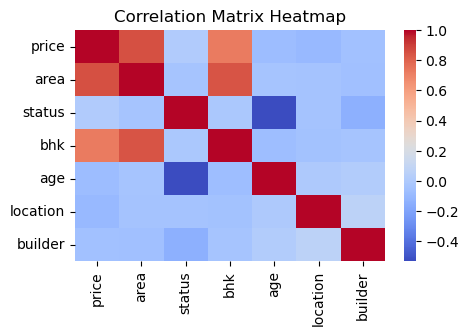

In [66]:
corr_matrix = data.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
